## dependency

In [49]:
import numpy as np
import math
import plotly
import plotly.graph_objs as go
import seaborn as sns
from matplotlib import pyplot as plt

# 선형방정식(Linear Equations)

## 개념
$$a_1x_1 + a_2x_2 + ... + a_nx_n = b$$

다음과 같이 미지수의 차수가 1인($x^1 = x$) 일차식과 상수항($b$)으로 이루어진 방정식을 선형방정식이라고 한다.

## 선형방정식인 것
$$2x_1 - 3x_2 + 1 = x_1$$

위 방정식은 정리하면 $x_1+3x=-1$ 꼴이므로 선형방정식이다.

$$x_2=2(\sqrt{5}-x_1)-x_3$$

위 방정식은 정리하면 $2x_1+x_2+x_3=2\sqrt{5}$ 꼴이므로 선형방정식이다.

### 선형방정식이 아닌 것
$$2x_1-3x_2=x_1x_2$$

$2x_1-3x_2$의 일차결합이 상수항으로 표현되지 않아 선형방정식이 아님

$$x_2 = 3\sqrt{x_1}-1$$

미지수의 차수가 $\frac{1}{2}$이므로 선형방정식이 아님.

$$x_1+\sin x_2 = 0$$

$\sin$배는 linear하지 않기 때문에 선형방정식이 아님.

### Sin 배의 그래프

In [32]:
#plotly. open in colab

x = np.arange(0, math.pi*2, 0.05)
x2 = np.arange(0, math.pi*2, 0.05)
y = np.sin(x) + x2
trace0 = go.Scatter(
   x = x, y = y
)

trace0 = go.Scatter(x=x, y=y)
data = [trace0]
plotly.offline.iplot({ "data": data,"layout": go.Layout(title="Sin wave")})

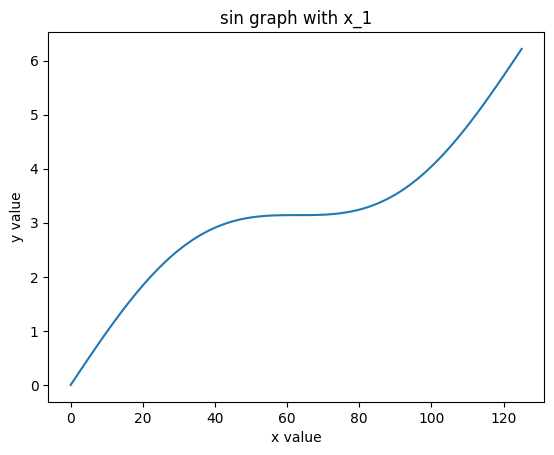

In [48]:
#seaborn

sns.lineplot(data=(y));

plt.xlabel('x value');
plt.ylabel('y value');
plt.title('sin graph with x_1');

plt.show();

# 선형연립방정식(system of linear equations)

## 개념
$$a_{11}x_1 + a_{12}x_2 + ... + a_{1n}+x_n = b_1$$

$$a_{21}x_1 + a_{22}x_2 + ... + a_{2n}+x_n = b_2$$

$$...$$

$$a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}+x_n = b_m$$

다음과 같은 미지수 $x_1, x_2, ... , x_n$에 관한 유한개의 선형방정식의 모임을 선형연립방정식이라고 한다.

만약, 위의 식에서 $b_1, b_2, ... b_m$이 모두 1인 경우, 동차선형연립방정식이라고 한다.
## 해
위의 식에서 $s_1, s_2, ... , s_n$을 각각 $x_1, x_2, ..., x_n$에 대입하였을 때 방정식이 모두 성립하면, 이를 선형방정식의 해라고 부르며, 해의 전체 집합을 해집합이라고 한다.
이때, 두 선형연립방정식의 해집합이 같으면 두 선형연립방정식을 동치라고 한다.

해가 존재하면 consistenct, 해가 존재하지 않으면 inconsistent라고 부른다.

선형연립방정식에 대해 보통 세 가지중 하나가 성립한다.

1. 유일한 해를 갖는 경우
2. 해가 없는 경우
3. 무수히 많은 해를 갖는 경우

각 선형방정식으로 나타내어진 평면 $H_1$, $H_2$, $H_3$이 3차원 $R^3$ 공간에 있다고 가정해보자.

그렇다면, 각 경우에 따라 다음과 같은 그림이 만들어진다.

<img src="./static/img/linear/linear1.png">

세 점이 같이 모이는 공간이 하나의 점에만 생성된 경우, 선형연립방정식은 **유일한 해**를 가진다.

<img src="./static/img/linear/linear2.png">

한편, 다음과 같이 세 평면의 점이 모두 만나지 않거나 세 평면중 두 평면만 만나는 점이 있을 경우, 선형연립방정식은 **해가 없다.**
또한, 해당 선형연립방정식에 속한 선형방정식은 **inconsistent하다**.

<img src="./static/img/linear/linear3.png">

마지막으로, 세 평면이 한 선에서 만나거나 서로 겹치는 경우, 해당 선형연립방정식은 **무수한 해**를 갖는다.

## Machine Learning을 위해 선형연립방정식의 해를 배우는 이유

Machine Learning에서 target값 $y$는 가중치 $w_n$와 미지수 $x_n$, 그리고 노이즈 $t$로 구성된 방정식이다.

즉, 머신러닝은 $y=w_1x_1+w_1x_2+ ... +w_nx_n+t$ 같은 구조의 방정식이며, EDA는 $x_n$의 수를 늘려가는 과정이라고 볼 수 있다.

그런데, 여기서 EDA를 통해 미지수를 늘리다보면 어느순간 데이터의 수보다 미지수의 숫자가 더 많아지는 경우가 생긴다.
예를 들어, 다음과 같이 n개의 변수가 있는 회귀모델이 있다고 가정하자.

$$x_1-2x_2+x_3+3x_4-x_5=0$$

$$x_3-5x_4+2x_5=1$$

$$x_4+x_5=2$$

식은 세개인데, 미지수의 개수는 5개이므로 해를 구할 수 없다. 이를 차원의 저주라고 한다.
이 경우, 미지수 2개에 임의의 실수 $t$,$s$등을 부여하여 다음과 같이 풀 수 있다. 이를 차원축소라고 한다.

$$x_1+x_3+3x_4=x_5+2x_2$$

$$x_3-5x_4=1-2x_5$$

$$x_4=2-x_5$$

여기서 $x_2=t, x_5=s$를 대입하면

$$x_1+x_3+3x_4=2t+s$$

$$x_3-5x_4=1-2s$$

$$x_4=2-s$$

로, 미지수의 개수(차원)가 $x_1, x_3, x_4$로 세개가 되어 식의 개수가 같아진다. 따라서 해당 연립방정식을 풀 수 있게 된다.

이렇게 특정 미지수를 임의의 실수로 지정하여 미지수의 숫자를 줄이는 과정이 바로 머신러닝에서 차원축소라고 볼 수 있다.

# Gauss 소거법

$\begin{cases}2x+3y=1 \\ x-2y = 4\end{cases}$일 때, x에 2를 곱하여 y를 구한다.

즉, $\begin{cases}2x+3y=1 \\ 2x - 4y = 8\end{cases}$로 구할 수 있으므로 윗변과 아랫변을 빼면
$\begin{cases}2x+3y=1 \\ -7y = 7\end{cases}$로 $y=-1$임을 알 수 있다.

이와 같이 *선형연립방정식의 해집합을 바꾸지 않는* 소거법을 Gauss 소거법이라고 한다.

1. 두 식을 교환
2. 한 식에 0이 아닌 실수를 곱함
3. 한 식에 0이 아닌 실수배를 하여 다른 식에 곱함

다음과 같은 과정으로 진행되는 것을 **기본행 연산**이라고 한다.

## 행 사다리꼴

행렬 $m \times n = E$가 다음과 같은 조건을 만족할 때, 행렬 E를 행 사다리꼴(REF)이라고 한다.

1. 만약 행의 성분이 모두 0인 행이 있다면 그 행은 가장 아래에 있다.
2. 각 행에서 처음으로 나타나는 0이 아닌 성분은 1이다. 이를 행의 선행선분(leading entry)이라고 한다
3. $i$행과 $i+1$행 모두에 선행선분이 존재하면 $i+1$의 선행선분은 $i$의 선행선분보다 오른쪽에 있다.

위의 조건을 모두 만족시키면서 아래의 조건을 추가로 만족할 때 행렬 E를 기약 행 사다리꼴(RREF)이라고 한다.

4. 어떤 행의 선행선분을 포함하는 열의 모든 성분은 0이다.

### 행 사다리꼴(RDF)의 예시

In [84]:
a = np.array([[1, 5, 3, 3], [0, 1, 2, 7], [0, 0, 1, 4]])
b = np.array([[1, 4, 5], [0, 1, 2], [0, 0, 1]])
c = np.array([[1, -1, 3, 4, 2], [0, 0, 0, 1, 3]])
d = np.array([[0, 0], [0, 0]])

print(f"array A \n{a}\n")
print(f"array B \n{b}\n")
print(f"array C \n{c}\n")
print(f"array D \n{d}")

array A 
[[1 5 3 3]
 [0 1 2 7]
 [0 0 1 4]]

array B 
[[1 4 5]
 [0 1 2]
 [0 0 1]]

array C 
[[ 1 -1  3  4  2]
 [ 0  0  0  1  3]]

array D 
[[0 0]
 [0 0]]


### 기약 행 사다리꼴(RRDF)의 예시

In [85]:
a = np.array([[1, 0, 0, 3], [0, 1, 0, 5], [0, 0, 1, 2]])
b = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
c = np.array([[0, 0, 0], [0, 0, 0]])
d = np.array([[1, -1, 3, 0, 2], [0, 0, 0, 1, 3], [0, 0, 0, 0, 0]])

print(f"array A \n{a}\n")
print(f"array B \n{b}\n")
print(f"array C \n{c}\n")
print(f"array D \n{d}")

array A 
[[1 0 0 3]
 [0 1 0 5]
 [0 0 1 2]]

array B 
[[1 0 0]
 [0 1 0]
 [0 0 1]]

array C 
[[0 0 0]
 [0 0 0]]

array D 
[[ 1 -1  3  0  2]
 [ 0  0  0  1  3]
 [ 0  0  0  0  0]]


## 기본행 연산

행렬 $m \times n = A$을 REF 혹은 RREF로 바꿀 때 사용하는 연산을 기본행 연산이라고 한다.

- A의 두 행 $A_i$과 $A_j$를 바꾼다.
- A에 0이 아닌 상수 n을 곱한다
- $A_i$행을 n배 하여 $A_j$에 더한다.

이와 같은 기본행 연산을 통해서 얻어진 행렬 $B$와 기존의 행렬 $A$를 행동치(row equivlent)라고 한다.

### 예제
행렬 $\left[\begin{matrix}0 & 0& -2 & 0 & 7 & 12 \\ 2 & 4 & -10 & 6 & 12 & 28 \\ 2 & 4 & -5 & 6 & -5 & -1\end{matrix}\right]$
에 대해 REF, RREF를 만들어라

In [137]:
matrixA = np.array(
   [
      [0, 0, -2, 0, 7, 12],
      [2, 4, -10, 6, 12, 28],
      [2, 4, -5, 6, -5, -1]
   ],
   float
)

#Step 1. 가장 위에 있는 성분이 다른 행과 같거나 더 많은 행을 가지도록 바꿔준다.
matrixA[0], matrixA[1] = matrixA[1], [0, 0, -2, 0, 7, 12]

#Step 2. 1행의 선행성분을 1로 만든다.
matrixA[0] = matrixA[0] / matrixA[0][0]

#Step 3. 선행성분 아래의 모든 성분을 0으로 만든다.
matrixA[2] = matrixA[2] - (matrixA[0] * 2)

#Step 4. 위의 행동을 반복한다.
matrixA[1] = matrixA[1] / -2 #Step 2
matrixA[2] = matrixA[2] - (matrixA[1] * 5) #Step 3

matrixA[2] = matrixA[2] * 2

print("REF: \n", matrixA) #REF

#Step 1.
matrixA[1] = matrixA[1] + (matrixA[2] * (7/2))

#Step 2.
matrixA[0] = matrixA[0] + (matrixA[2] * -6)

#Step 3.
matrixA[0] = matrixA[0] + (matrixA[1] * 5)

print("RREF: \n", matrixA)

REF: 
 [[ 1.   2.  -5.   3.   6.  14. ]
 [-0.  -0.   1.  -0.  -3.5 -6. ]
 [ 0.   0.   0.   0.   1.   2. ]]
RREF: 
 [[1. 2. 0. 3. 0. 7.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 2.]]


또, **첨가행렬이 행동치인 두 선형방정식은 *동치*이다.**
즉, **해집합이 *같다.***

## Gauss 소거법의 numpy 활용 계산법

방정식을 첨가행렬 형태로 나타내면 numpy를 통해 RDF, RRDF로 만들어 답을 구할 수 있다.

**예)**

$\begin{cases}x+y+2x=9 \\ 2x+4y-3z=1 \\ 3x+6y-5z=0 \end{cases}$에서 $x$, $y$, $z$를 구하여라.

In [78]:
matrix = np.array([[1, 1, 2, 9], [2, 4 , -3, 1], [3, 6, -5, 0]], float)
#(x, y, z) Equations
print("initial array\n", matrix, "\n")

matrix[1] = matrix[1] + (matrix[0] * -2)
print("first calucluated array\n", matrix, "\n")

matrix[2] =  + matrix[2] + (matrix[0] * -3)
print("second calucluated array\n", matrix, "\n")

matrix[1] = matrix[1] * 0.5
print("third calucluated array \n", matrix, "\n")

matrix[2] = matrix[2] + (matrix[1] * -3)
print("fourth calculated array \n", matrix, "\n")

matrix[2] = matrix[2] * -2
print(f"Gauss eliminated array\n {matrix}\n")

print(f"thus,\nz = {matrix[2][3]}")
z = 3
print(f"y = {z * 3.5 + matrix[1][3]}")
y = 2
print(f"x = {matrix[0][3] - (matrix[0][2] * z) - matrix[0][1] * y}")

initial array
 [[ 1.  1.  2.  9.]
 [ 2.  4. -3.  1.]
 [ 3.  6. -5.  0.]] 

first calucluated array
 [[  1.   1.   2.   9.]
 [  0.   2.  -7. -17.]
 [  3.   6.  -5.   0.]] 

second calucluated array
 [[  1.   1.   2.   9.]
 [  0.   2.  -7. -17.]
 [  0.   3. -11. -27.]] 

third calucluated array 
 [[  1.    1.    2.    9. ]
 [  0.    1.   -3.5  -8.5]
 [  0.    3.  -11.  -27. ]] 

fourth calculated array 
 [[ 1.   1.   2.   9. ]
 [ 0.   1.  -3.5 -8.5]
 [ 0.   0.  -0.5 -1.5]] 

Gauss eliminated array
 [[ 1.   1.   2.   9. ]
 [ 0.   1.  -3.5 -8.5]
 [-0.  -0.   1.   3. ]]

thus,
z = 3.0
y = 2.0
x = 1.0


### 예제
**다음 선형연립방정식을 Gauss 소거법으로 풀어라**
$$\begin{cases} x+2y+3z = 9 \\ 2x - y + z = 8 \\ 3x - z = 3 \end{cases}$$

In [149]:
matrix = np.array(
   [
      [1, 2, 3, 9],
      [2, -1, 1, 8],
      [3, 0, -1, 3]
   ],
   float
)

matrix[1] = matrix[1] - (matrix[0] * 2)
matrix[2] = matrix[2] - (matrix[0] * 3)

matrix[1] = matrix[1] / -5
matrix[2] = matrix[2] + (matrix[1] * 6)

matrix[2] = matrix[2] / -4

z = matrix[2][3]
y = matrix[1][3] - z
x = matrix[0][3] - 2 * y - 3 * z
print(matrix, "\n\nAnswer\nx=", x)
print("y=", y)
print("z=", z)

[[ 1.  2.  3.  9.]
 [-0.  1.  1.  2.]
 [-0. -0.  1.  3.]] 

Answer
x= 2.0
y= -1.0
z= 3.0


## Gauss-Jordan 소거법

방정식을 첨가행렬 형태로 만든 뒤, RRDF 형태로 변환하여 푸는 방법

위의 일반해를 벡터 형태로 나타낼 수 있다.

In [153]:
vec = np.array(
   [
      [x],
      [y],
      [z]
   ],
   float
)

print(vec)

[[ 2.]
 [-1.]
 [ 3.]]


<img src="./static/img/linear4.png">

**용어 정리**

- 선행변수: 선행성분 1을 포함하는 열에 대응하는 변수
- 자유변수: 선행성분 1을 포함하지 않는 열에 대응하는 변수

<img src="./static/img/linear5.png">